Importing the libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3,preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import keras

In [34]:
input_dir='/content/drive/MyDrive/Data/Classes'

Build the base model - Inception v3

In [35]:
base_model=InceptionV3(input_shape=(512,512,3),include_top=False)

In [36]:
for layer in base_model.layers:
  layer.trainable=False

In [37]:
X=Flatten()(base_model.output)
X=Dense(units=6,activation='sigmoid')(X)

#The Final model after Attaching the Dense Layer

model=Model(base_model.input,X)

#Compile the Model
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

#Summary
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 255, 255, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_188 (Batch  (None, 255, 255, 32  96         ['conv2d_188[0][0]']             
 Normalization)                 )                                                           

In [38]:
train_datagen=ImageDataGenerator(featurewise_center=True,
                              rotation_range=0.4,
                              width_shift_range=0.3,
                              horizontal_flip=True,
                              preprocessing_function=preprocess_input,
                              zoom_range=0.4,
                              shear_range=0.4)
train_data=train_datagen.flow_from_directory(directory=input_dir,
                                             target_size=(512,512),
                                             batch_size=36)


Found 420 images belonging to 6 classes.


In [39]:
train_data.class_indices

{'Cheetah': 0, 'Fox': 1, 'Lion': 2, 'Lioness': 3, 'Tiger': 4, 'WhiteTiger': 5}

See the data preprocessed

In [40]:
t_img,label=train_data.next()

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


In [41]:
t_img

array([[[[-0.60738826, -0.69115174, -0.7457437 ],
         [-0.6002946 , -0.6865691 , -0.7336279 ],
         [-0.5944207 , -0.6806952 , -0.727754  ],
         ...,
         [-0.56608504, -0.5817713 , -0.6773548 ],
         [-0.62896836, -0.64465463, -0.74119985],
         [-0.64323306, -0.65891933, -0.7597976 ]],

        [[-0.6069944 , -0.6898023 , -0.7472609 ],
         [-0.6055647 , -0.69094896, -0.7406784 ],
         [-0.6069566 , -0.6932311 , -0.7402899 ],
         ...,
         [-0.5492505 , -0.56493676, -0.6663214 ],
         [-0.60396886, -0.61965513, -0.72109044],
         [-0.6103972 , -0.6260835 , -0.72793365]],

        [[-0.59355295, -0.6723988 , -0.7417435 ],
         [-0.59606874, -0.67775834, -0.738572  ],
         [-0.60207665, -0.68835115, -0.73541   ],
         ...,
         [-0.55579   , -0.5714763 , -0.67343706],
         [-0.60391194, -0.6195982 , -0.721559  ],
         [-0.59879977, -0.61448604, -0.7164468 ]],

        ...,

        [[-0.55031013, -0.5908915 , -0

In [42]:
t_img.shape

(36, 512, 512, 3)

Model CheckPoint

In [43]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
mc=ModelCheckpoint(filepath="./best_model.h5",
                   monitor="accuracy",
                   verbose=1,
                   save_best_only=True
                   )
es=EarlyStopping(monitor="accuracy",
                 min_delta=0.01,
                 patience=5,
                 verbose=1)
cb=[mc,es]

In [44]:
his=model.fit_generator(train_data,
steps_per_epoch=10,
epochs=10,
validation_freq=1,
callbacks=cb)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/10
10/10 [==============================] - ETA: 0s - loss: 4.6167 - accuracy: 0.6111
Epoch 00001: accuracy improved from -inf to 0.61111, saving model to ./best_model.h5
10/10 [==============================] - 53s 5s/step - loss: 4.6167 - accuracy: 0.6111
Epoch 2/10
10/10 [==============================] - ETA: 0s - loss: 0.9902 - accuracy: 0.9195
Epoch 00002: accuracy improved from 0.61111 to 0.91954, saving model to ./best_model.h5
10/10 [==============================] - 35s 4s/step - loss: 0.9902 - accuracy: 0.9195
Epoch 3/10
10/10 [==============================] - ETA: 0s - loss: 0.3927 - accuracy: 0.9425
Epoch 00003: accuracy improved from 0.91954 to 0.94253, saving model to ./best_model.h5
10/10 [==============================] - 27s 3s/step - loss: 0.3927 - accuracy: 0.9425
Epoch 4/10
10/10 [==============================] - ETA: 0s - loss: 0.1877 - accuracy: 0.9598
Epoch 00004: accuracy improved from 0.94253 to 0.95977, saving model to ./best_model.h5
10/10 [=======

In [45]:
from keras.models import load_model 
model=load_model("/content/best_model.h5")

In [46]:
h=his.history
h.keys

<function dict.keys>

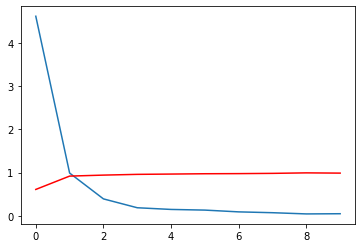

In [47]:
plt.plot(h['loss'])
plt.plot(h['accuracy'],c='red')

In [48]:
import tensorflow as tf

In [49]:
import os
import cv2

Custom Functions for displaying images

In [52]:
import cv2
from matplotlib import pyplot as plt
def showtiger():
  fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
  rows = 2
  columns = 2
  
# reading images
  Image1 = tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/Data/test/T/15.jpg',target_size=(512,512)))
  Image2 = tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/Data/test/T/20.jpg',target_size=(512,512)))
  Image3 = tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/Data/test/T/22.jpg',target_size=(512,512)))
  Image4 =tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/Data/test/T/27.jpg',target_size=(512,512)))
  
# Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, 1)
  
# showing image
  plt.imshow(Image1/255.)
  plt.axis('off')
  plt.title("First")
  
# Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)
  
# showing image
  plt.imshow(Image2/255.)
  plt.axis('off')
  plt.title("Second")
  
# Adds a subplot at the 3rd position
  fig.add_subplot(rows, columns, 3)
  
# showing image
  plt.imshow(Image3/255.)
  plt.axis('off')
  plt.title("Third")
  
# Adds a subplot at the 4th position
  fig.add_subplot(rows, columns, 4)
  
# showing image
  plt.imshow(Image4/255.)
  plt.axis('off')
  plt.title("Fourth")

In [57]:
def showwhitetiger():
  fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
  rows = 2
  columns = 2
  
# reading images
  Image1 = tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/Data/test/WT/108.jpg',target_size=(512,512)))
  Image2 = tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/Data/test/WT/119.jpg',target_size=(512,512)))
  Image3 = tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/Data/test/WT/136.jpg',target_size=(512,512)))
  Image4 =tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/Data/test/WT/147.jpg',target_size=(512,512)))
  
# Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, 1)
  
# showing image
  plt.imshow(Image1/255.)
  plt.axis('off')
  plt.title("First")
  
# Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)
  
# showing image
  plt.imshow(Image2/255.)
  plt.axis('off')
  plt.title("Second")
  
# Adds a subplot at the 3rd position
  fig.add_subplot(rows, columns, 3)
  
# showing image
  plt.imshow(Image3/255.)
  plt.axis('off')
  plt.title("Third")
  
# Adds a subplot at the 4th position
  fig.add_subplot(rows, columns, 4)
  
# showing image
  plt.imshow(Image4/255.)
  plt.axis('off')
  plt.title("Fourth")

In [59]:
def showfox():
  fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
  rows = 2
  columns = 2
  
# reading images
  Image1 = tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/Data/test/F/26.jpg',target_size=(512,512)))
  Image2 = tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/Data/test/F/29.jpg',target_size=(512,512)))
  Image3 = tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/Data/test/F/40.jpg',target_size=(512,512)))
  Image4 =tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/Data/test/F/41.jpg',target_size=(512,512)))
  
# Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, 1)
  
# showing image
  plt.imshow(Image1/255.)
  plt.axis('off')
  plt.title("First")
  
# Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)
  
# showing image
  plt.imshow(Image2/255.)
  plt.axis('off')
  plt.title("Second")
  
# Adds a subplot at the 3rd position
  fig.add_subplot(rows, columns, 3)
  
# showing image
  plt.imshow(Image3/255.)
  plt.axis('off')
  plt.title("Third")
  
# Adds a subplot at the 4th position
  fig.add_subplot(rows, columns, 4)
  
# showing image
  plt.imshow(Image4/255.)
  plt.axis('off')
  plt.title("Fourth")

In [63]:
def showLioness():
  fig = plt.figure(figsize=(10, 7))
  
# setting values to rows and column variables
  rows = 2
  columns = 2
  
# reading images
  Image1 = tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/Data/test/L/61.jpg',target_size=(512,512)))
  Image2 = tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/Data/test/L/73.jpg',target_size=(512,512)))
  Image3 = tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/Data/test/L/74.jpg',target_size=(512,512)))
  Image4 =tf.keras.utils.img_to_array(tf.keras.utils.load_img('/content/drive/MyDrive/Data/test/L/76.jpg',target_size=(512,512)))
  
# Adds a subplot at the 1st position
  fig.add_subplot(rows, columns, 1)
  
# showing image
  plt.imshow(Image1/255.)
  plt.axis('off')
  plt.title("First")
  
# Adds a subplot at the 2nd position
  fig.add_subplot(rows, columns, 2)
  
# showing image
  plt.imshow(Image2/255.)
  plt.axis('off')
  plt.title("Second")
  
# Adds a subplot at the 3rd position
  fig.add_subplot(rows, columns, 3)
  
# showing image
  plt.imshow(Image3/255.)
  plt.axis('off')
  plt.title("Third")
  
# Adds a subplot at the 4th position
  fig.add_subplot(rows, columns, 4)
  
# showing image
  plt.imshow(Image4/255.)
  plt.axis('off')
  plt.title("Fourth")

Testing the model

Tiger


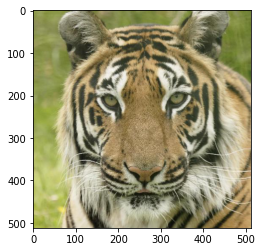

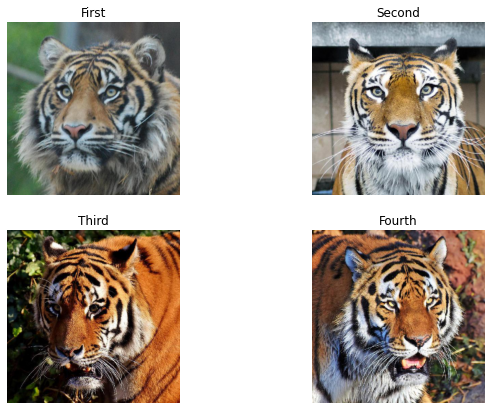

In [53]:
path='/content/drive/MyDrive/Data/test/156.jpg'
img=tf.keras.utils.load_img(path,target_size=(512,512))
i=tf.keras.utils.img_to_array(img)
plt.imshow(i/255.)
i=preprocess_input(i)
#print(i)
input_arr=np.array([i])
pred=np.argmax(model.predict(input_arr))
if pred==0:
  print('Cheetah')
elif pred==1:
  print('Fox')
elif pred==2:
  print('Lion')
elif pred==3:
  print('Lioness')
elif pred==4:
  print('Tiger')
  showtiger()
elif pred==5:
  print('WhiteTiger')

Fox


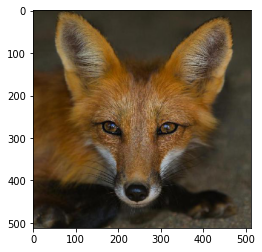

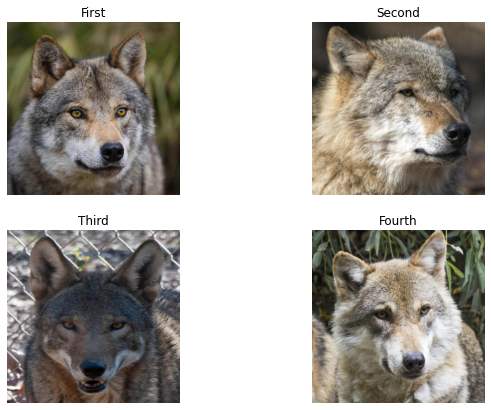

In [60]:
path='/content/drive/MyDrive/Data/test/626.jpg'
img=tf.keras.utils.load_img(path,target_size=(512,512))
i=tf.keras.utils.img_to_array(img)
plt.imshow(i/255.)
i=preprocess_input(i)
#print(i)
input_arr=np.array([i])
pred=np.argmax(model.predict(input_arr))
if pred==0:
  print('Cheetah')
elif pred==1:
  print('Fox')
  showfox()
elif pred==2:
  print('Lion')
elif pred==3:
  print('Lioness')
elif pred==4:
  print('Tiger')
elif pred==5:
  print('WhiteTiger')

Lioness


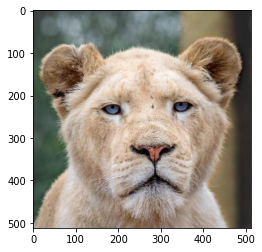

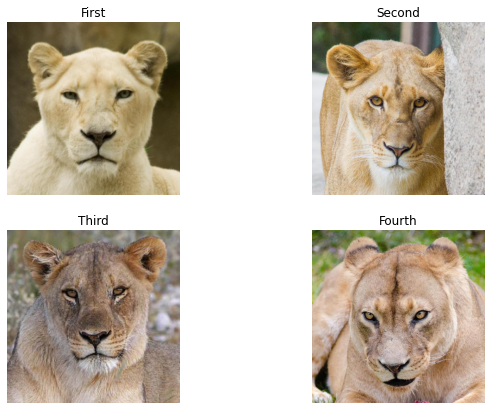

In [64]:
path='/content/drive/MyDrive/Data/test/1525.jpg'
img=tf.keras.utils.load_img(path,target_size=(512,512))
i=tf.keras.utils.img_to_array(img)
plt.imshow(i/255.)
i=preprocess_input(i)
#print(i)
input_arr=np.array([i])
pred=np.argmax(model.predict(input_arr))
if pred==0:
  print('Cheetah')
elif pred==1:
  print('Fox')
elif pred==2:
  print('Lion')
elif pred==3:
  print('Lioness')
  showLioness()
elif pred==4:
  print('Tiger')
elif pred==5:
  print('WhiteTiger')

WhiteTiger


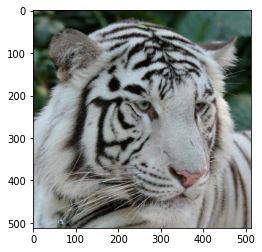

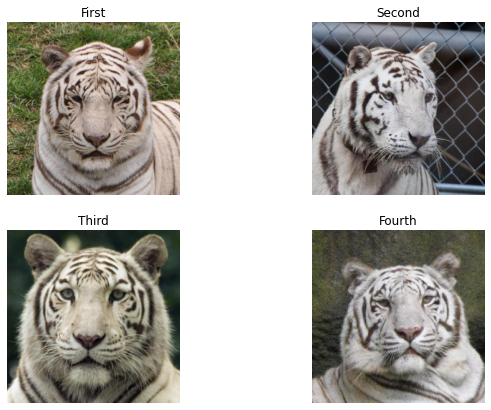

In [58]:
path='/content/drive/MyDrive/Data/test/1649.jpg'
img=tf.keras.utils.load_img(path,target_size=(512,512))
i=tf.keras.utils.img_to_array(img)
plt.imshow(i/255.)
i=preprocess_input(i)
#print(i)
input_arr=np.array([i])
pred=np.argmax(model.predict(input_arr))
if pred==0:
  print('Cheetah')
elif pred==1:
  print('Fox')
elif pred==2:
  print('Lion')
elif pred==3:
  print('Lioness')
elif pred==4:
  print('Tiger')
elif pred==5:
  print('WhiteTiger')
  showwhitetiger()